### Made by Manthan A Panchal

## Crime Data Analysis, Clustering

Problem Statement:

Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [184]:
#importing the necessary libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import k_means

plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows', None)

## EDA

In [193]:
df = pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [27]:
df.columns = ['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'] #Renaming the columns
df

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [29]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Data Preprocessing

The data has different  min and max values for different features

the data need to be normalized so that the min max values of all the features
are between 1 and -1

In [46]:
def normalize(i):
    x = (i - i.min()) / (i.max() - i.min())
    return (x)

In [48]:
norm_df  = normalize(df.iloc[:,1:])
norm_df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### the same can be achieved by using the min max scaler

In [62]:
scaler = MinMaxScaler()

minmax_norm = scaler.fit_transform(df.iloc[:,1:])

minmax_norm = pd.DataFrame(minmax_norm)
minmax_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


Note: there is no need to standardize(Z-score) the data bcoz it will normally distribute it and mess up our data

## Method 1 HCLustering

### Applying Hierarchial Clustering Algorithm

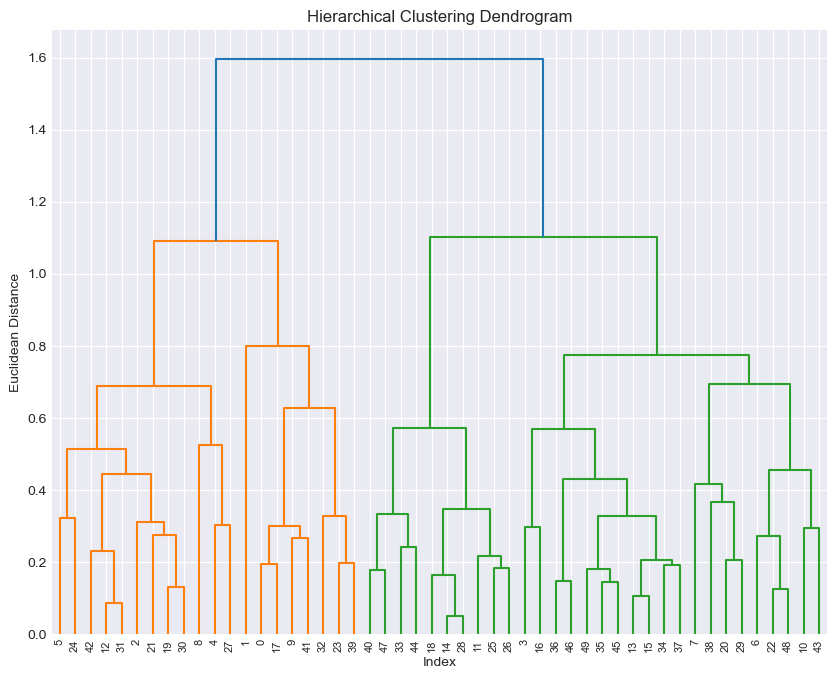

In [70]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

z = linkage(norm_df, method='complete', metric='euclidean')

plt.figure(figsize=(10,8), dpi=100)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
sch.dendrogram(z)
plt.show()

#### Now we have the dendrogram now we need to find the cluster size 


common method to set the cluster size is by looking at 

the longest vertical line and cutting at right below where 

it ends and then count the number of vertical line at that level.

the cluster size is found to be 4 in our case.

In [104]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity = 'euclidean').fit(norm_df)
hc.labels_

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [105]:
df['Cluster'] = hc.labels_
df.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


#### Now we have a look at it in a visualize the clusters

In [106]:
df.shape

(50, 6)

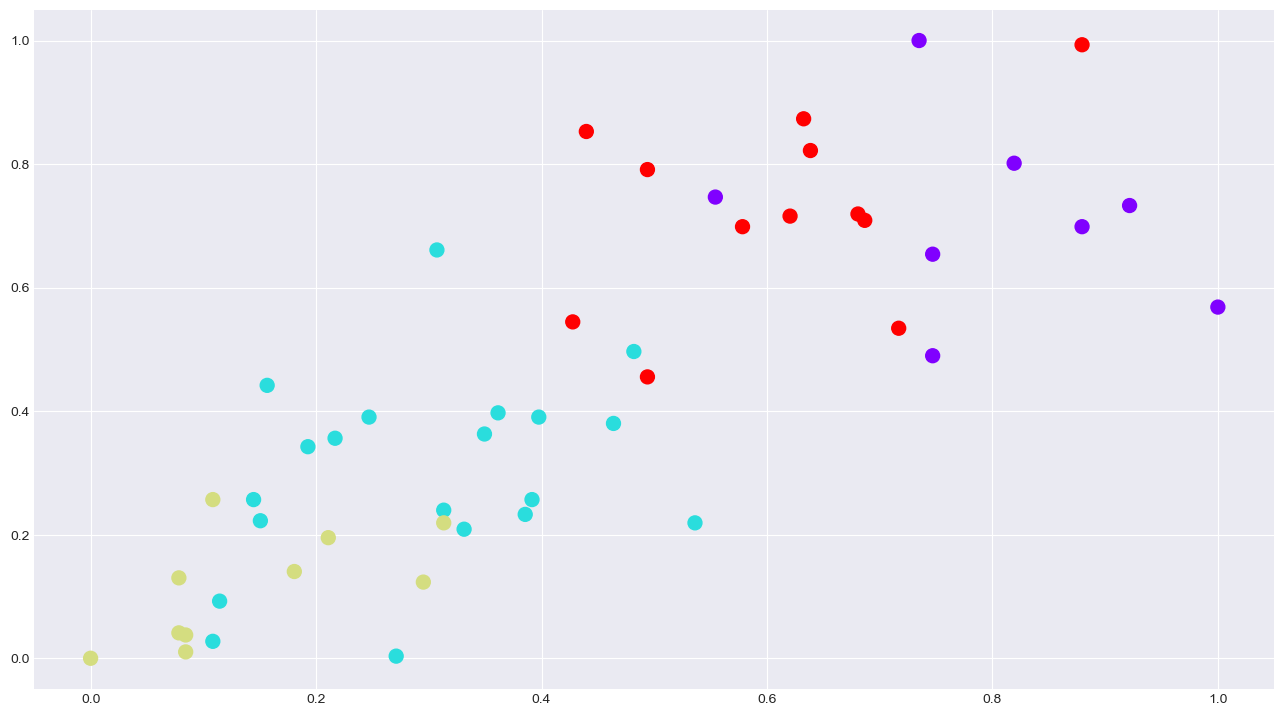

In [107]:
plt.figure(figsize=(16,9), dpi = 100)
plt.scatter(norm_df.Murder, norm_df.Assault, c = hc.labels_  ,s = 100, cmap = 'rainbow')

In [110]:
df.groupby(df.Cluster).mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


In [117]:
df.loc[df.Cluster == 0]#plot(type = 'bar')

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


## Method 2 Kmeans Clustering

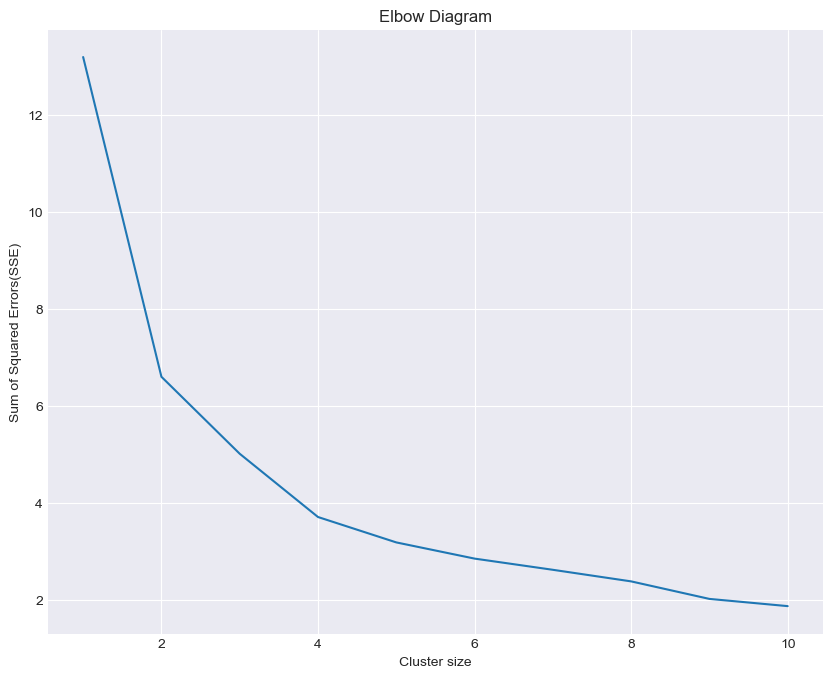

In [125]:
plt.figure(figsize=(10,8),  dpi = 100)

from sklearn.cluster import KMeans

#creating 10 clusters 


WCSS = list() #within cluster sum of squares

for i in range(1,11):
    clf = KMeans(n_clusters = i)
    clf.fit(norm_df)
    WCSS.append(clf.inertia_)
    
plt.plot(np.arange(1,11), WCSS)
plt.xlabel('Cluster size')
plt.ylabel('Sum of Squared Errors(SSE)')
plt.title('Elbow Diagram')
plt.show()

### we can observe from the elbow diagra that the ideal cluster size is 2

In [203]:
clf = KMeans(n_clusters=4)
clf.fit_predict(norm_df)
clf.labels_

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 3, 0, 1, 2, 3, 2,
       1, 0, 3, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [204]:
kmean_df = df

In [205]:
kmean_df['KClust'] = pd.DataFrame(clf.labels_)
kmean_df.drop(columns = ['Cluster', 'Clusters'], inplace = True)
kmean_df.head()

KeyError: "['Cluster' 'Clusters'] not found in axis"

<Figure size 1000x600 with 0 Axes>

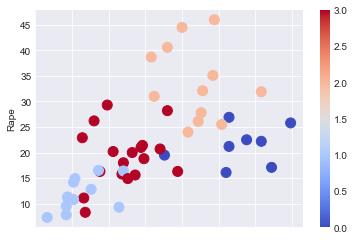

In [206]:
plt.figure(figsize=(10,6), dpi=100)
kmean_df.plot(x = 'Murder', y = "Rape", c = clf.labels_, kind = 'scatter',s = 100, cmap = plt.cm.coolwarm)
plt.show()

In [165]:
clf.cluster_centers_

array([[0.68463855, 0.72003425, 0.61694915, 0.56498708],
       [0.24518072, 0.23778539, 0.53615819, 0.22334195]])

In [166]:
clf.inertia_

6.596893867946199

### Method 3 DBSCAN

In [189]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

dbscan  = DBSCAN(eps = 0.25, min_samples = 3)
dbscan.fit(norm_df)
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [190]:
sklearn.metrics.silhouette_score(norm_df, dbscan.labels_)

0.20624439694672403

In [192]:
sklearn.metrics.silhouette_samples(norm_df, dbscan.labels_)

array([ 0.36185935, -0.30885783, -0.48686508, -0.36913672, -0.30888555,
       -0.29738933,  0.43508798, -0.33725508, -0.50597727,  0.37276623,
       -0.47258275,  0.55494774,  0.54022883,  0.37891631,  0.57855412,
        0.47312151,  0.19666558,  0.2284207 ,  0.55189183,  0.45382804,
        0.14907681,  0.3494379 ,  0.56197905,  0.4549159 , -0.3676488 ,
        0.49007329,  0.56260947, -0.36953203,  0.57230306, -0.26542072,
        0.59286671,  0.52760422, -0.47181254,  0.5006183 ,  0.1811992 ,
        0.26712934,  0.12837177,  0.42515162,  0.14242528,  0.37454161,
        0.50875188,  0.21105582,  0.39613389,  0.28230567,  0.41106433,
        0.13506515,  0.22171983,  0.39609045,  0.55071339,  0.35409138])

In [209]:
dbcan_df = df
dbcan_df['dbclust'] = pd.DataFrame(dbscan.labels_)
dbcan_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,dbclust,KClust
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,-1,2
2,Arizona,8.1,294,80,31.0,-1,2
3,Arkansas,8.8,190,50,19.5,-1,0
4,California,9.0,276,91,40.6,-1,2
5,Colorado,7.9,204,78,38.7,-1,2
6,Connecticut,3.3,110,77,11.1,1,3
7,Delaware,5.9,238,72,15.8,-1,3
8,Florida,15.4,335,80,31.9,-1,2
9,Georgia,17.4,211,60,25.8,0,0


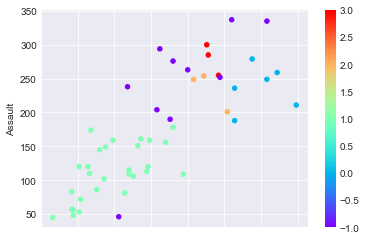

In [210]:
dbcan_df.plot(x = 'Murder', y = 'Assault', c = dbscan.labels_, kind = 'scatter', cmap = 'rainbow')

## Observations

### Upon close inspection it is found that the best solution to this problem is given by Kmeans Clustering

In [214]:
kmean_df.drop(columns = 'dbclust', inplace=True)

KeyError: "['dbclust'] not found in axis"

In [215]:
kmean_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,KClust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


## Inferences

In [256]:
kmean_df.groupby(kmean_df.KClust).mean()

,Murder,Assault,UrbanPop,Rape
KClust,,,,
0,13.937500,243.625000,53.750000,21.412500
1,3.091667,76.000000,52.083333,11.833333
2,10.966667,264.000000,76.500000,33.608333
3,6.066667,139.388889,72.444444,19.166667


#### We can see that the cluster 0 has the worst situation iterms of Crime

In [225]:
clust_0 = kmean_df.loc[(kmean_df.KClust == 0)]

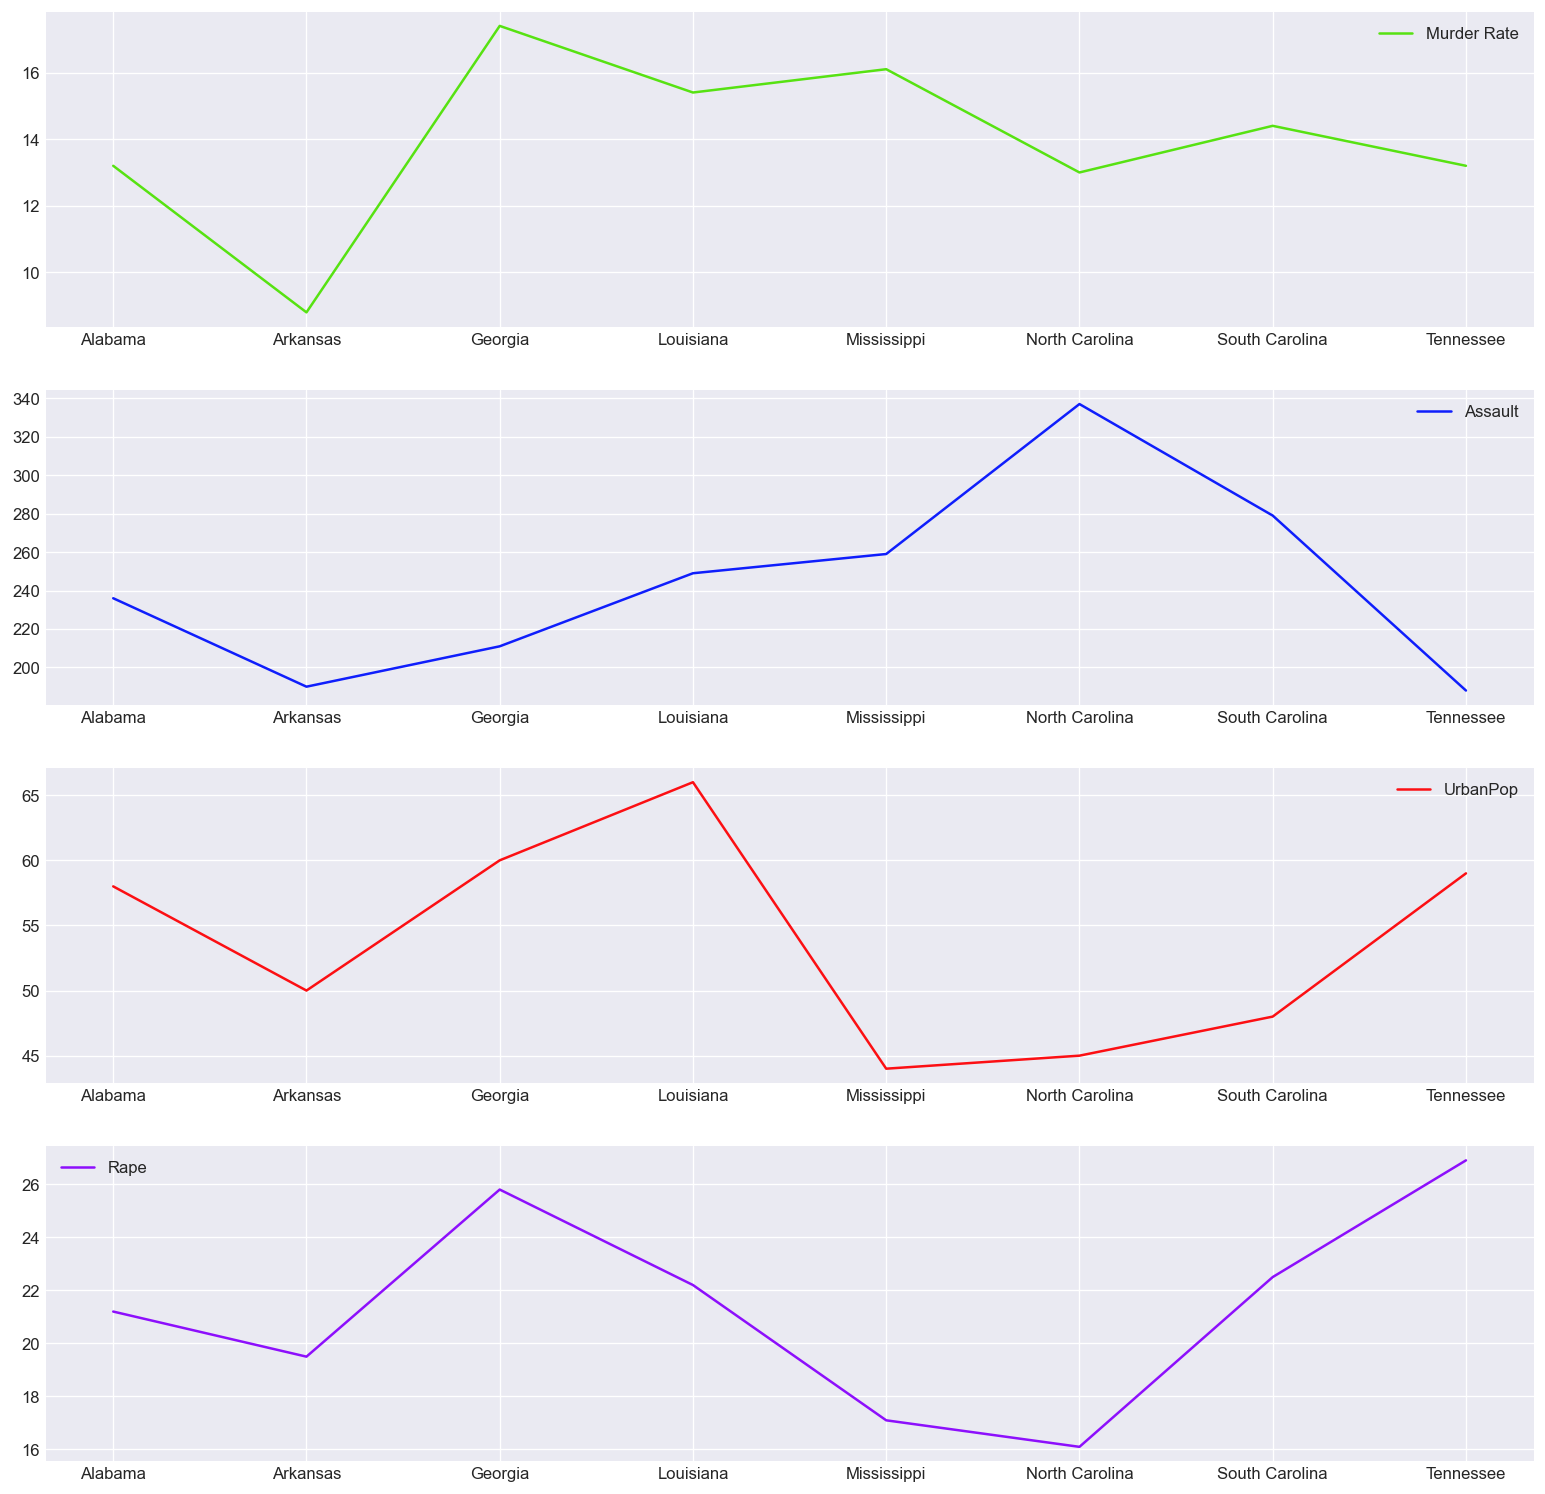

In [252]:
plt.figure(figsize=(16,16),  dpi = 120)

plt.subplot(4,1,1)
plt.plot(clust_0.iloc[:,0], clust_0.Murder, color = '#57e212', label = 'Murder Rate' )
plt.legend()

plt.subplot(4,1,2)
plt.plot(clust_0.iloc[:,0], clust_0.Assault, color = '#0f1efc', label = 'Assault' )
plt.legend()

plt.subplot(4,1,3)
plt.plot(clust_0.iloc[:,0], clust_0.UrbanPop, color = '#fc0f13', label = 'UrbanPop' )
plt.legend()

plt.subplot(4,1,4)
plt.plot(clust_0.iloc[:,0], clust_0.Rape, color = '#8d0ffc', label = 'Rape' )
plt.legend()

plt.show()


we can notice that Georgia is the highest in Murder rate

Nort carolina in assault

louisiana in UrbanPop

Tennesse in Rape

Cluster 0 has the cities with highest amount of crime 

the group can be considered the most unsafe states

In [260]:
clust_1 = kmean_df.loc[(kmean_df.KClust == 1)]
clust_2 = kmean_df.loc[(kmean_df.KClust == 2)]
clust_3 = kmean_df.loc[(kmean_df.KClust == 3)]
clust_1.mean()

Murder       3.091667
Assault     76.000000
UrbanPop    52.083333
Rape        11.833333
KClust       1.000000
dtype: float64

In [262]:
clust_2.mean()

Murder       10.966667
Assault     264.000000
UrbanPop     76.500000
Rape         33.608333
KClust        2.000000
dtype: float64

In [265]:
clust_3.mean()

Murder        6.066667
Assault     139.388889
UrbanPop     72.444444
Rape         19.166667
KClust        3.000000
dtype: float64

The cluster 3 states can be termed as the lowest crime states as they have the lest mean of crimes as compared to other clusters